In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install Pillow Mat4py matplotlib scikit-learn Numpy PyWavelets torch --quiet

In [ ]:
import os
import PIL.Image
from mat4py import loadmat
import PIL
import matplotlib.pyplot as plt
from sklearn import covariance
import sklearn
import numpy as np
import pywt
import statistics
import torch
import tensorflow as tf

In [ ]:
from mswavelet import MSWavelet

In [ ]:
#print("Torch GPU: ", torch.cuda.get_device_name(0))
#print("Tensorflow GPU: ", tf.config.list_physical_devices('GPU'))

rootdir = "/content/gdrive/My Drive/MRIFreeDataset/Initial & repeat MRI in MS-Free Dataset"
print("Rootdir", "exists: \""+rootdir+"\"" if os.path.exists(path=rootdir) else "does not exist.")

Rootdir exists: "/content/gdrive/My Drive/MRIFreeDataset/Initial & repeat MRI in MS-Free Dataset"


In [ ]:
# Demo
msw = MSWavelet()
msw.printinfo()

MSWavelet arrays: 
Number of MRI scans:  1838
Number of unhealthy MRI scans:  677
Number of healthy MRI scans:  1161

Discrete Wavelets list:  ['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'haar', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'sym2', 'sym3', 'sym4', 'sym5', 'sym6', 'sym7', 'sym8'

In [ ]:
# Batch Upsampling
print("Batch Upsampling:")
imgnames = msw.unhealthy_images[:20]
imgfiles = []
for imgname in imgnames:
    imgfile = PIL.Image.open(msw.tif_filename(imgname))
    imgfilenumpy = np.asarray(imgfile)
    if imgfilenumpy.shape[0] == 512:
        imgfiles.append(imgfilenumpy)
imgups = msw.upsample(imgfiles, size=1024)
print("Upscale images array: ", imgups.shape)

Batch Upsampling:
Upsampled shape:  (20, 1024, 1024) Original type:  <class 'numpy.uint8'>
Upscale images array:  (20, 1024, 1024)


In [ ]:
# Batch Wavelet Transforms
img, coeffs_dwt2 = pywt.dwt2(imgups, wavelet="bior6.8")
print("Batch DWT2D array shape: ", np.asarray(coeffs_dwt2).shape)
coeffs_cwt, freqs = pywt.cwt(imgups, wavelet="mexh", scales=np.arange(1,8,2))
print("Batch CWT array shape: ", np.asarray(coeffs_cwt).shape)

Batch DWT2D array shape:  (3, 20, 520, 520)
Batch CWT array shape:  (4, 20, 1024, 1024)


In [ ]:
# Type of cells in Wavelet Transforms
print("What type are the results of wavelet transform?")
print("CWT snippet: ", type(coeffs_cwt[0][0][0][30]), coeffs_cwt[0][0][0][30:33])
print("DWT2D snippet: ", type(coeffs_dwt2[0][0][0][30]), coeffs_dwt2[0][0][0][30:33])
# Free memory
coeffs_dwt2, coeffs_cwt = [], []

What type are the results of wavelet transform?
CWT snippet:  <class 'numpy.float64'> [-0. -0. -0.]
DWT2D snippet:  <class 'numpy.float64'> [-1.41013929e-13 -1.41013929e-13 -1.41013929e-13]



UPSAMPLED IMAGE:

Upsampled shape:  (1024, 1024) Original type:  <class 'numpy.uint8'>


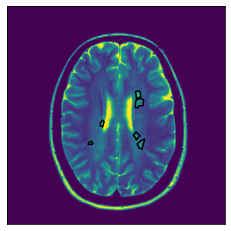

Newimg:  (1024, 1024)

 MEXH CONTINUOUS TRANSFORM

Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


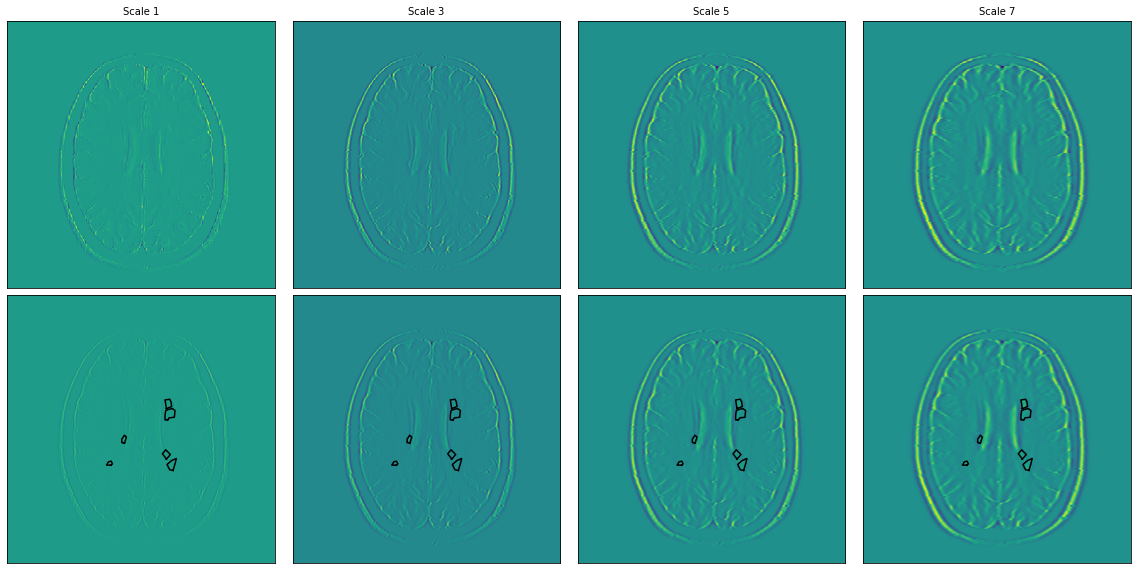


 FBSP CONTINUOUS TRANSFORM



c:\program files\python38\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets of family fbsp, without parameters specified in the name are deprecated.  The name should take the form fbspM-B-C where M is the spline order and B, C are floats representing the bandwidth frequency and center frequency, respectively (example: fbsp1-1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
C:\Users\Devid Duma\OneDrive\Epoka MSc\development\mswavelet.py:253: ComplexWarning: Casting complex values to real discards the imaginary part
  coeffs2 = np.array(coeffs2, dtype=self.WT_DTYPE)


Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


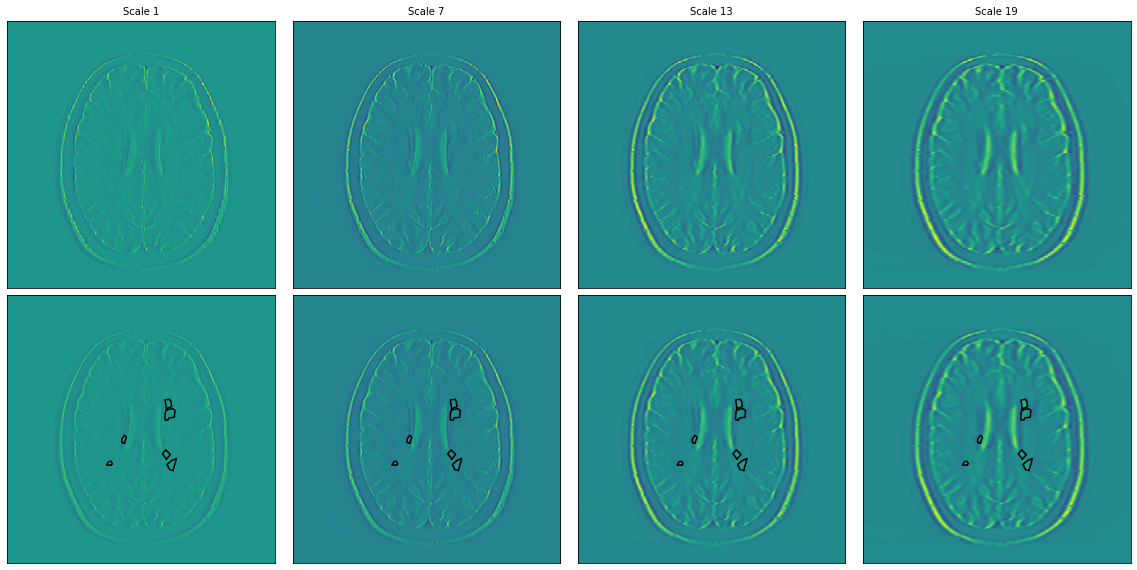


 CGAU4 CONTINUOUS TRANSFORM



C:\Users\Devid Duma\OneDrive\Epoka MSc\development\mswavelet.py:253: ComplexWarning: Casting complex values to real discards the imaginary part
  coeffs2 = np.array(coeffs2, dtype=self.WT_DTYPE)


Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


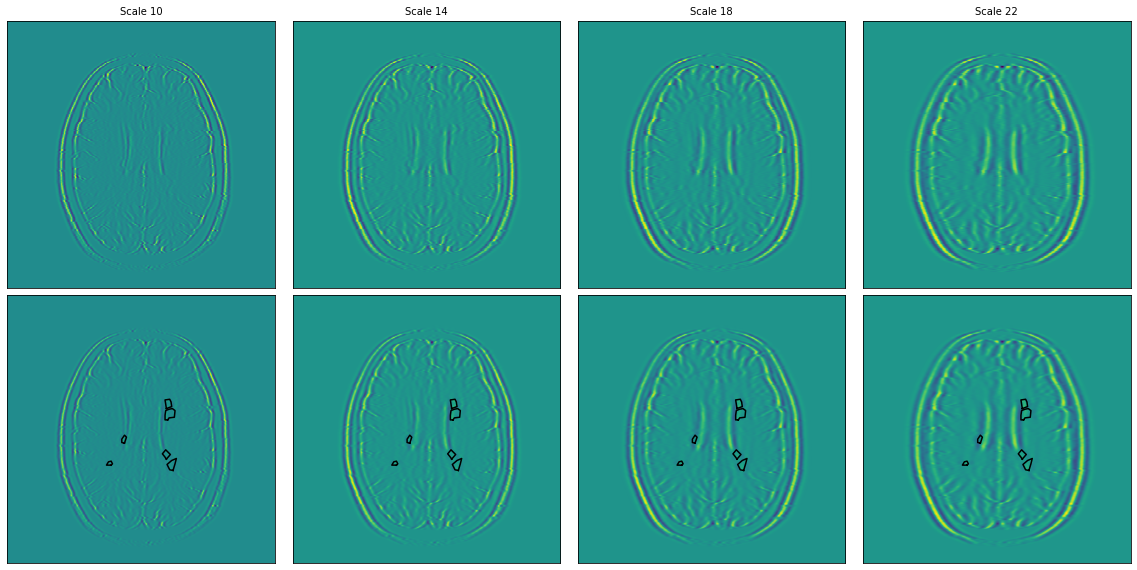


 CGAU8 CONTINUOUS TRANSFORM



C:\Users\Devid Duma\OneDrive\Epoka MSc\development\mswavelet.py:253: ComplexWarning: Casting complex values to real discards the imaginary part
  coeffs2 = np.array(coeffs2, dtype=self.WT_DTYPE)


Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


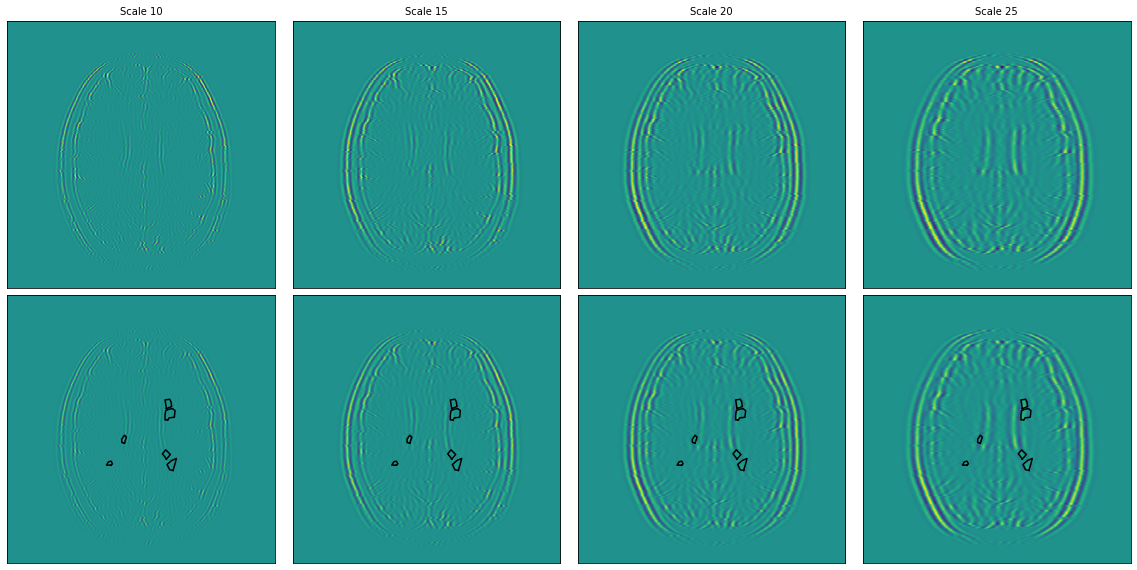


 MORL CONTINUOUS TRANSFORM

Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


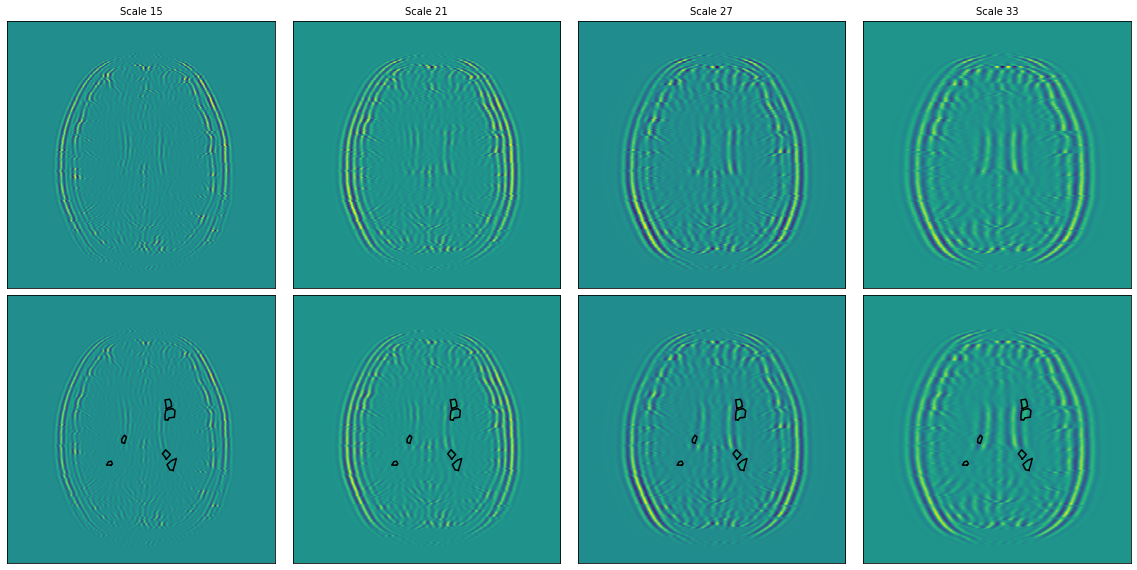


 GAUS4 CONTINUOUS TRANSFORM

Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


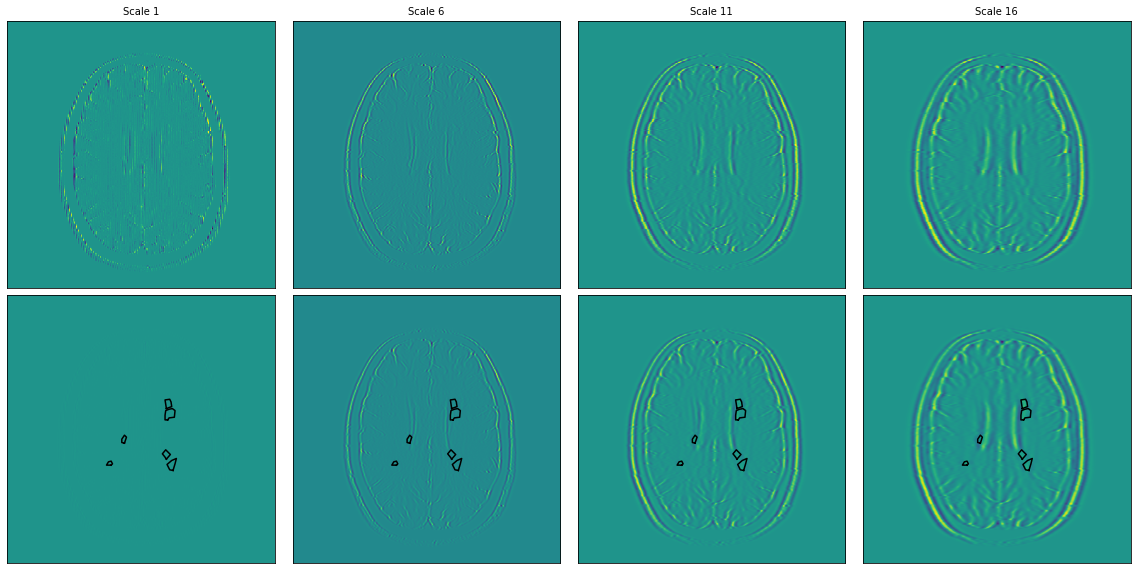


 CMOR CONTINUOUS TRANSFORM



c:\program files\python38\lib\site-packages\pywt\_cwt.py:117: FutureWarning: Wavelets from the family cmor, without parameters specified in the name are deprecated. The name should takethe form cmorB-C where B and C are floats representing the bandwidth frequency and center frequency, respectively (example: cmor1.5-1.0).
  wavelet = DiscreteContinuousWavelet(wavelet)
C:\Users\Devid Duma\OneDrive\Epoka MSc\development\mswavelet.py:253: ComplexWarning: Casting complex values to real discards the imaginary part
  coeffs2 = np.array(coeffs2, dtype=self.WT_DTYPE)


Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


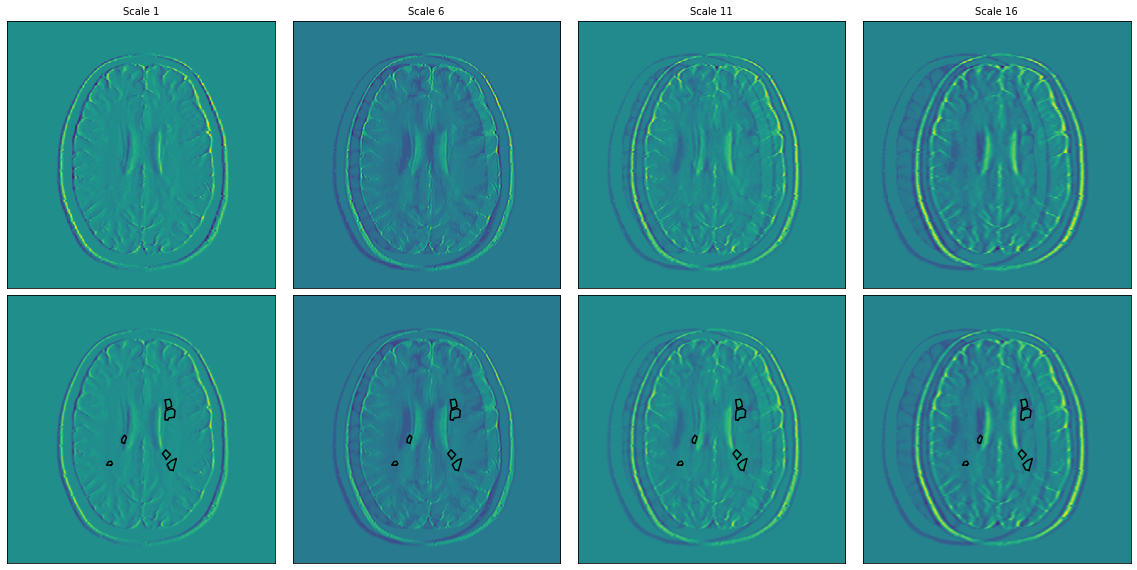


UPSAMPLED IMAGE:

Upsampled shape:  (1024, 1024) Original type:  <class 'numpy.uint8'>


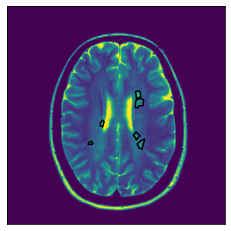

Newimg:  (1024, 1024)

 BIOR6.8 DISCRETE TRANSFORM

Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


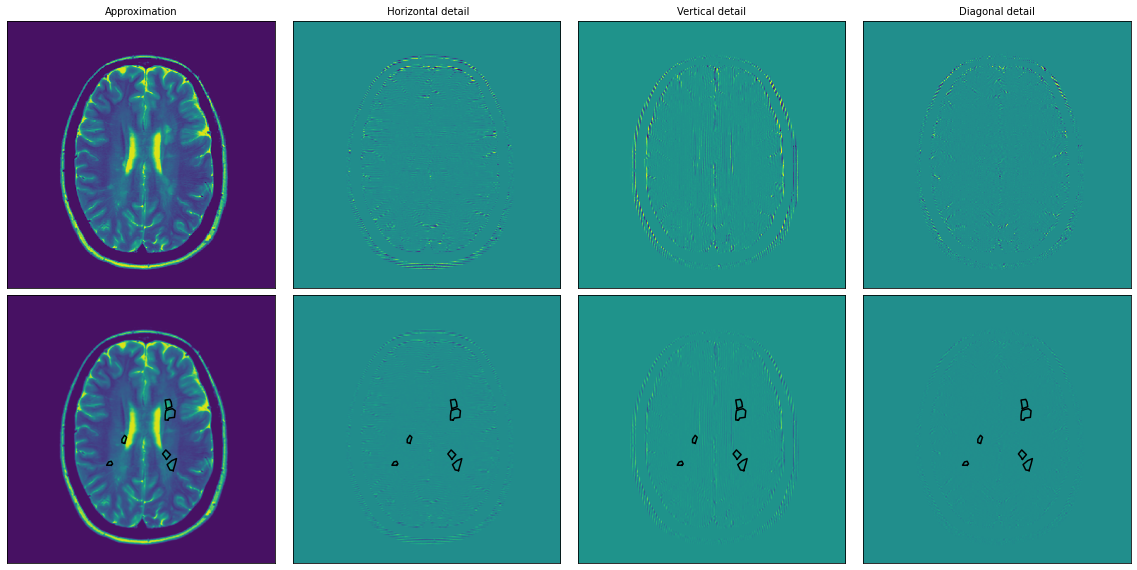


 HAAR DISCRETE TRANSFORM

Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


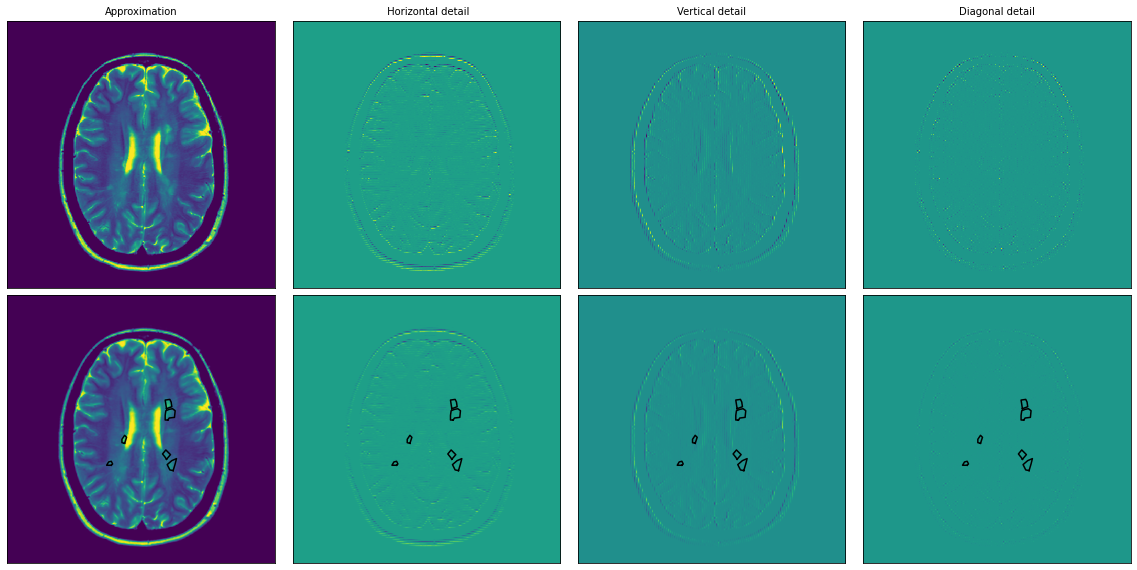


 RBIO4.4 DISCRETE TRANSFORM

Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


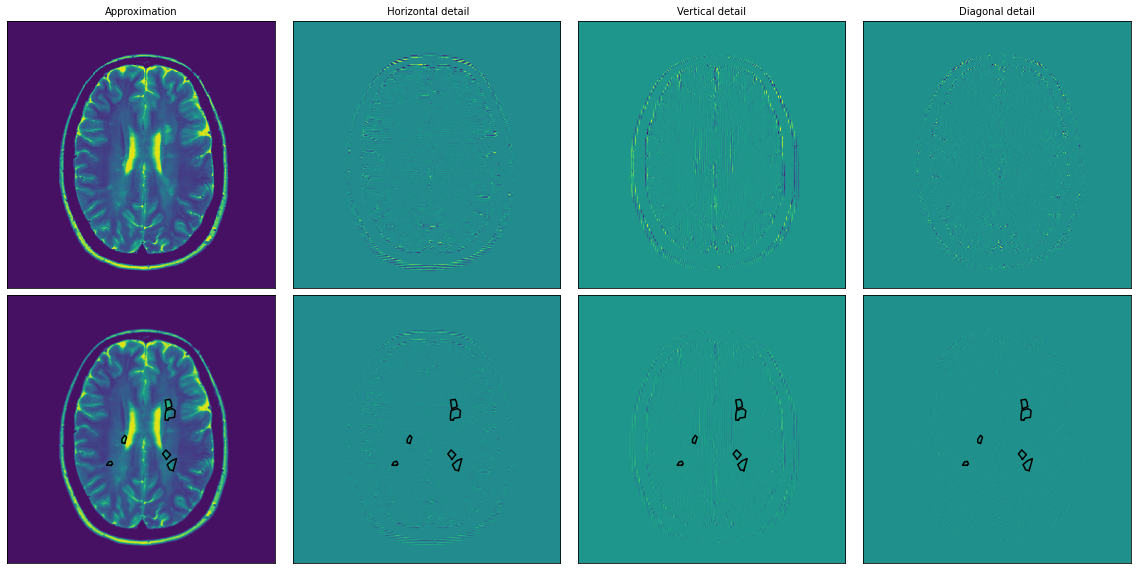


 SYM12 DISCRETE TRANSFORM

Plaque files for image:  ['./MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_1.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_2.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_3.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_4.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_5.plq', './MRIFreeDataset\\Initial & repeat MRI in MS-Free Dataset\\CK\\2\\img018_6.plq']


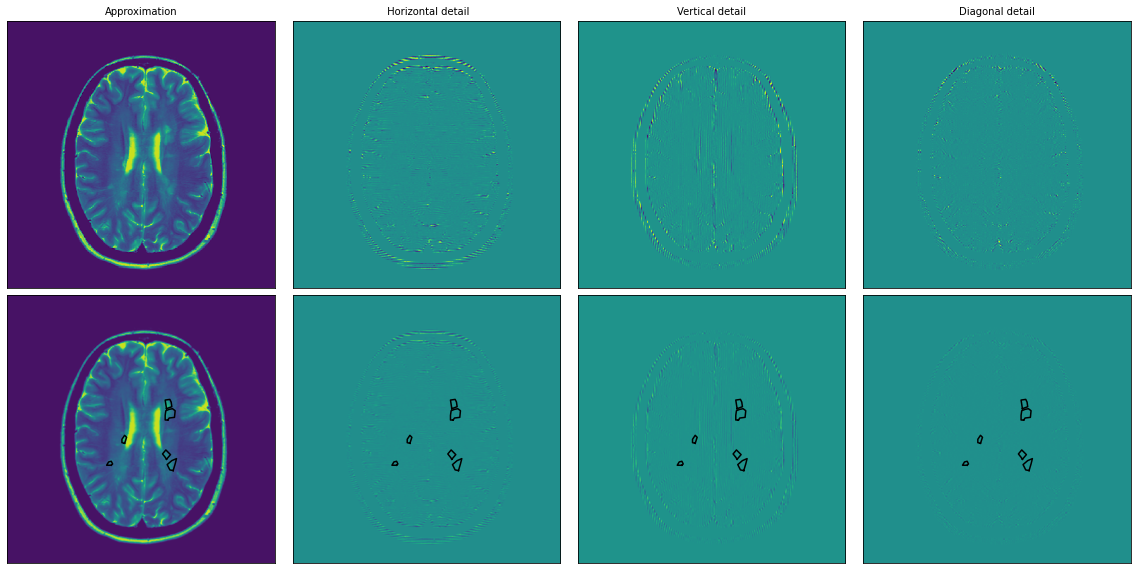

In [ ]:
# Wavelet Transforms
dwtlist = ["bior6.8", "haar", "rbio4.4", "sym12"]
cwtlist = ["mexh", "fbsp", "cgau4", "cgau8", "morl", "gaus4", "cmor"]
cwtscales = [np.arange(1,8,2), np.arange(1,20,6), np.arange(10,24,4), np.arange(10,27,5), np.arange(15,35,6), np.arange(1,17,5), np.arange(1,17,5)]

# Plot unhealthy image + wavelet transforms
msw.plot_transforms(wtlist=cwtlist, type="continuous", cwtscales=cwtscales, imgname=msw.unhealthy_images[100])
msw.plot_transforms(wtlist=dwtlist, type="discrete", imgname=msw.unhealthy_images[100])